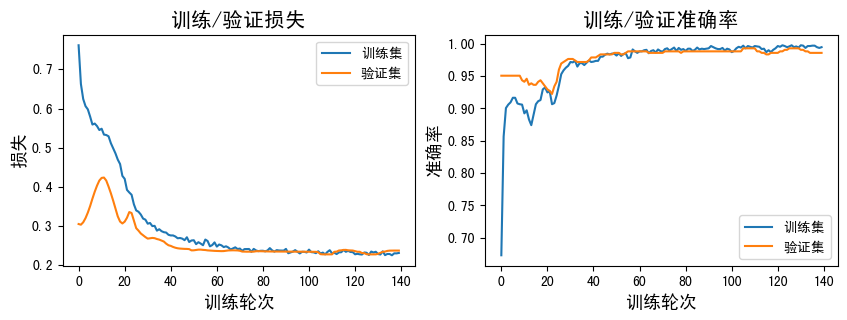

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = 'Times New Roman'
# plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['font.weight'] = 'bold'
# Load data from npz file
data = np.load('../output/plotloss_info.npz')
train_losses = data['train_losses']
train_accuracies = data['train_accuracies']
val_losses = data['val_losses']
val_accuracies = data['val_accuracies']

# Number of epochs
epochs = np.arange(len(train_losses))

# Plotting
plt.figure(figsize=(10, 3))

# Subplot for loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='训练集')
plt.plot(epochs, val_losses, label='验证集')
plt.title('训练/验证损失',size=15)
plt.xlabel('训练轮次',size=13)
plt.ylabel('损失',size=13)
plt.legend()

# Subplot for accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='训练集')
plt.plot(epochs, val_accuracies, label='验证集')
plt.title('训练/验证准确率',size=15)
plt.xlabel('训练轮次',size=13)
plt.ylabel('准确率',size=13)
plt.legend()
plt.savefig("plot/loss_acc.png", dpi=600, bbox_inches = 'tight')
plt.show()




/hpcfs/fhome/linjw/.conda/envs/biobase/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/hpcfs/fhome/linjw/.conda/envs/biobase/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


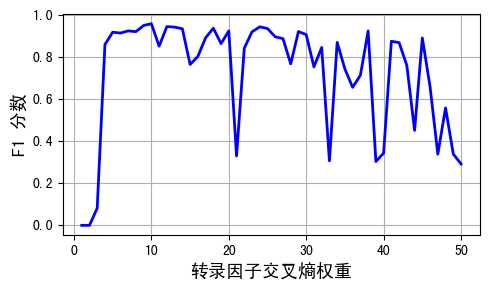

In [11]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['font.weight'] = 'bold'
def calculate_metrics(state, pos_label=1):
    output_path = f"../output/loss_weight/ER  M_{state}.txt"
    label_path = f'../output/loss_weight/label_{state}.dat.test'
    
    # Read data
    output = pd.read_table(output_path, header=None)
    label = pd.read_table(label_path, header=None)

    # Sort label
    label = label.sort_values(0)

    # Rename columns and select needed columns
    output.columns = ['Idx', 'Ept', 'GroundTruth', 'Predict']
    output['GroundTruth'] = label[3].values
    output = output[['GroundTruth', 'Predict']]

    # Calculate metrics
    precision = precision_score(output['GroundTruth'], output['Predict'], pos_label=pos_label)
    recall = recall_score(output['GroundTruth'], output['Predict'], pos_label=pos_label)
    f1 = f1_score(output['GroundTruth'], output['Predict'], pos_label=pos_label)

    return {'State': state, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Create a list to store the results
results_list = []

# Iterate through states and calculate metrics
for state in range(50):
    metrics_dict = calculate_metrics(state, pos_label=1)
    results_list.append(metrics_dict)

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results_list)[['Precision','Recall','F1 Score']]
import matplotlib.pyplot as plt
import numpy as np

# 生成一些示例数据
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# 创建图表和坐标轴
fig, ax = plt.subplots(figsize=(5, 3))
# 绘制折线图
ax.plot(range(1,51), results_df['F1 Score'].values, linestyle='-', color='b', linewidth=2)
ax.set_xlabel('转录因子交叉熵权重',size=13)
ax.set_ylabel('F1 分数',size=13)
# 显示图例
# 设置网格线
ax.grid(True)

# 调整布局
plt.tight_layout()
# 显示图表
plt.savefig("plot/loss_weight.png", dpi=300, bbox_inches = 'tight')
plt.show()
